# **Machine Learning (ML) - Classification**
## **Project: Network_Intrusion_Detection Prediction**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Background :**

### The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type.

In [2]:
!pip install lightgbm

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2,f_classif
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report, f1_score
import xgboost as xgb
#import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Train_data.csv')
df.head()# take an overview look at the data


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
#Total number of records: 25192 ,Total number of features: 42
df.shape  

(25192, 42)

# **Part 1: Data Cleaning**

In [6]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

It appears that there are no null values occurred in the dataset.


In [7]:
df.dtypes # Datatypes of different features.


duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [8]:
df.rename(columns = {'class':'attack'}, inplace=True)

In [ ]:
df.head() #change the "class" column's name into "attack"

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df.shape

(25192, 42)

# **Part 2: Exploratory Data Analysis (EDA)**

In [ ]:
df.describe().T#statistical information

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


 ## 1 what is the most Protocols used?

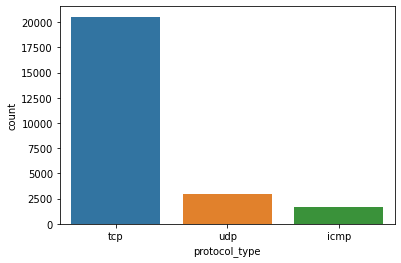

In [ ]:
sns.countplot(x="protocol_type", data=df)
plt.show()

## q2 the attack's type chart

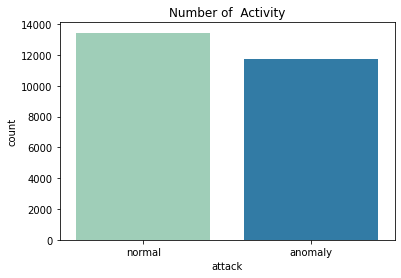

In [ ]:
class_ = sns.countplot(df['attack'], palette='YlGnBu');
class_.set_title("Number of  Activity");

In [ ]:
## 3 flag distribution

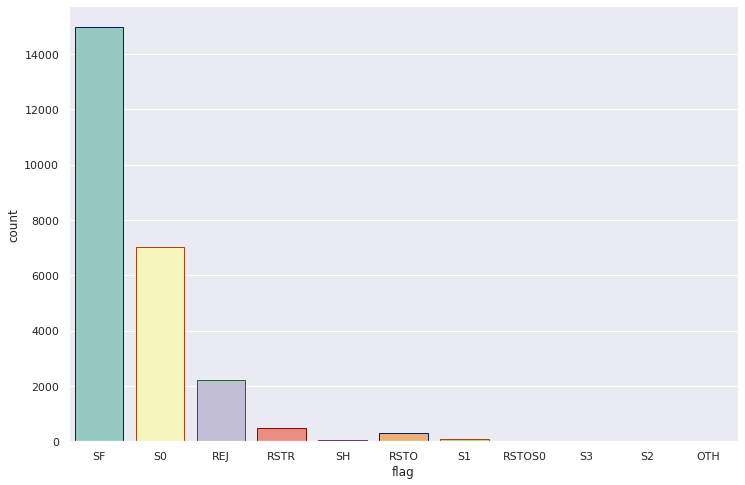

In [ ]:
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
sns.set(style="darkgrid")
sns.countplot(x="flag",
              data=df,
              palette="Set3",
              edgecolor=sns.color_palette("dark", 5))
plt.show()

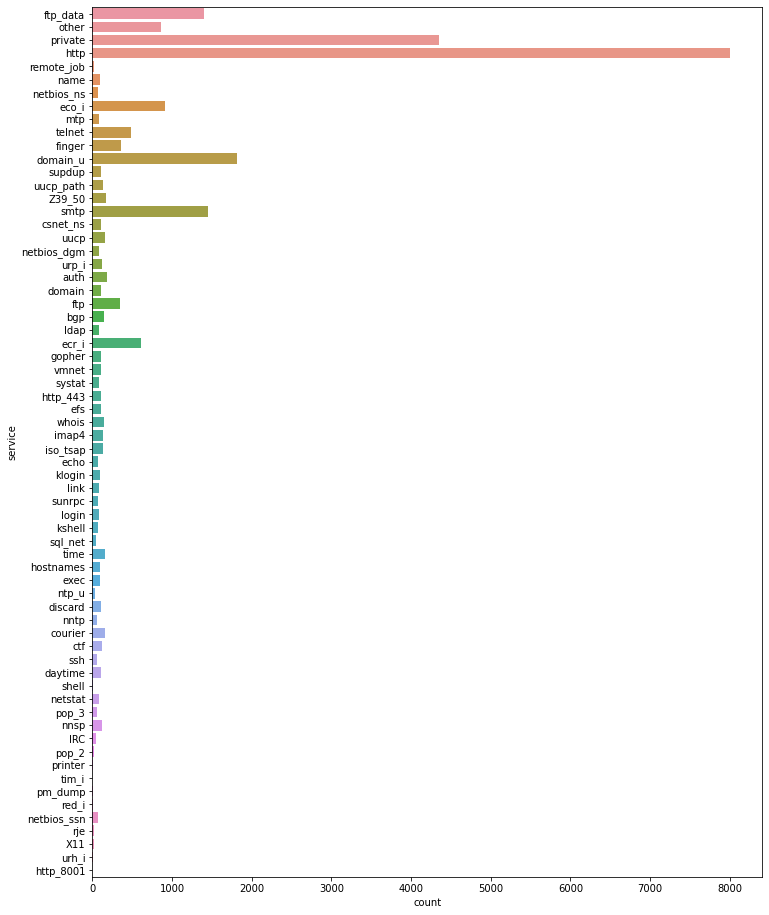

In [ ]:
plt.figure(figsize=(12,16))
sns.countplot(y="service", data=df)
plt.show() 


In [13]:
le = preprocessing.LabelEncoder()
df['attack']= le.fit_transform(df.attack.values)

In [14]:
# 4 Does wrong fragment column affects the attack?

a=df.groupby(['attack'])[['wrong_fragment']].sum().sort_values('wrong_fragment', ascending=False)
a


,wrong_fragment
attack,
0,598
1,0


In [15]:
b=df.groupby(['service'])[['attack']].sum().sort_values('attack', ascending=False)
b


,attack
service,
http,7564
domain_u,1817
smtp,1390
ftp_data,1001
other,519
...,...
login,0
mtp,0
netbios_dgm,0


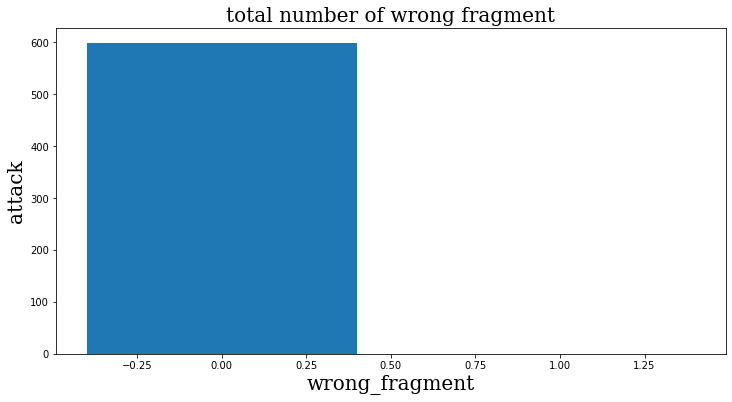

In [16]:
plt.figure(figsize=[12,6]);
plt.bar(a.index,a.wrong_fragment);
plt.title('total number of wrong fragment',fontsize=20,color='black',family='serif');
plt.xlabel('wrong_fragment',fontsize=20,color='black',family='serif');
plt.ylabel('attack',fontsize=20,color='black',family='serif');

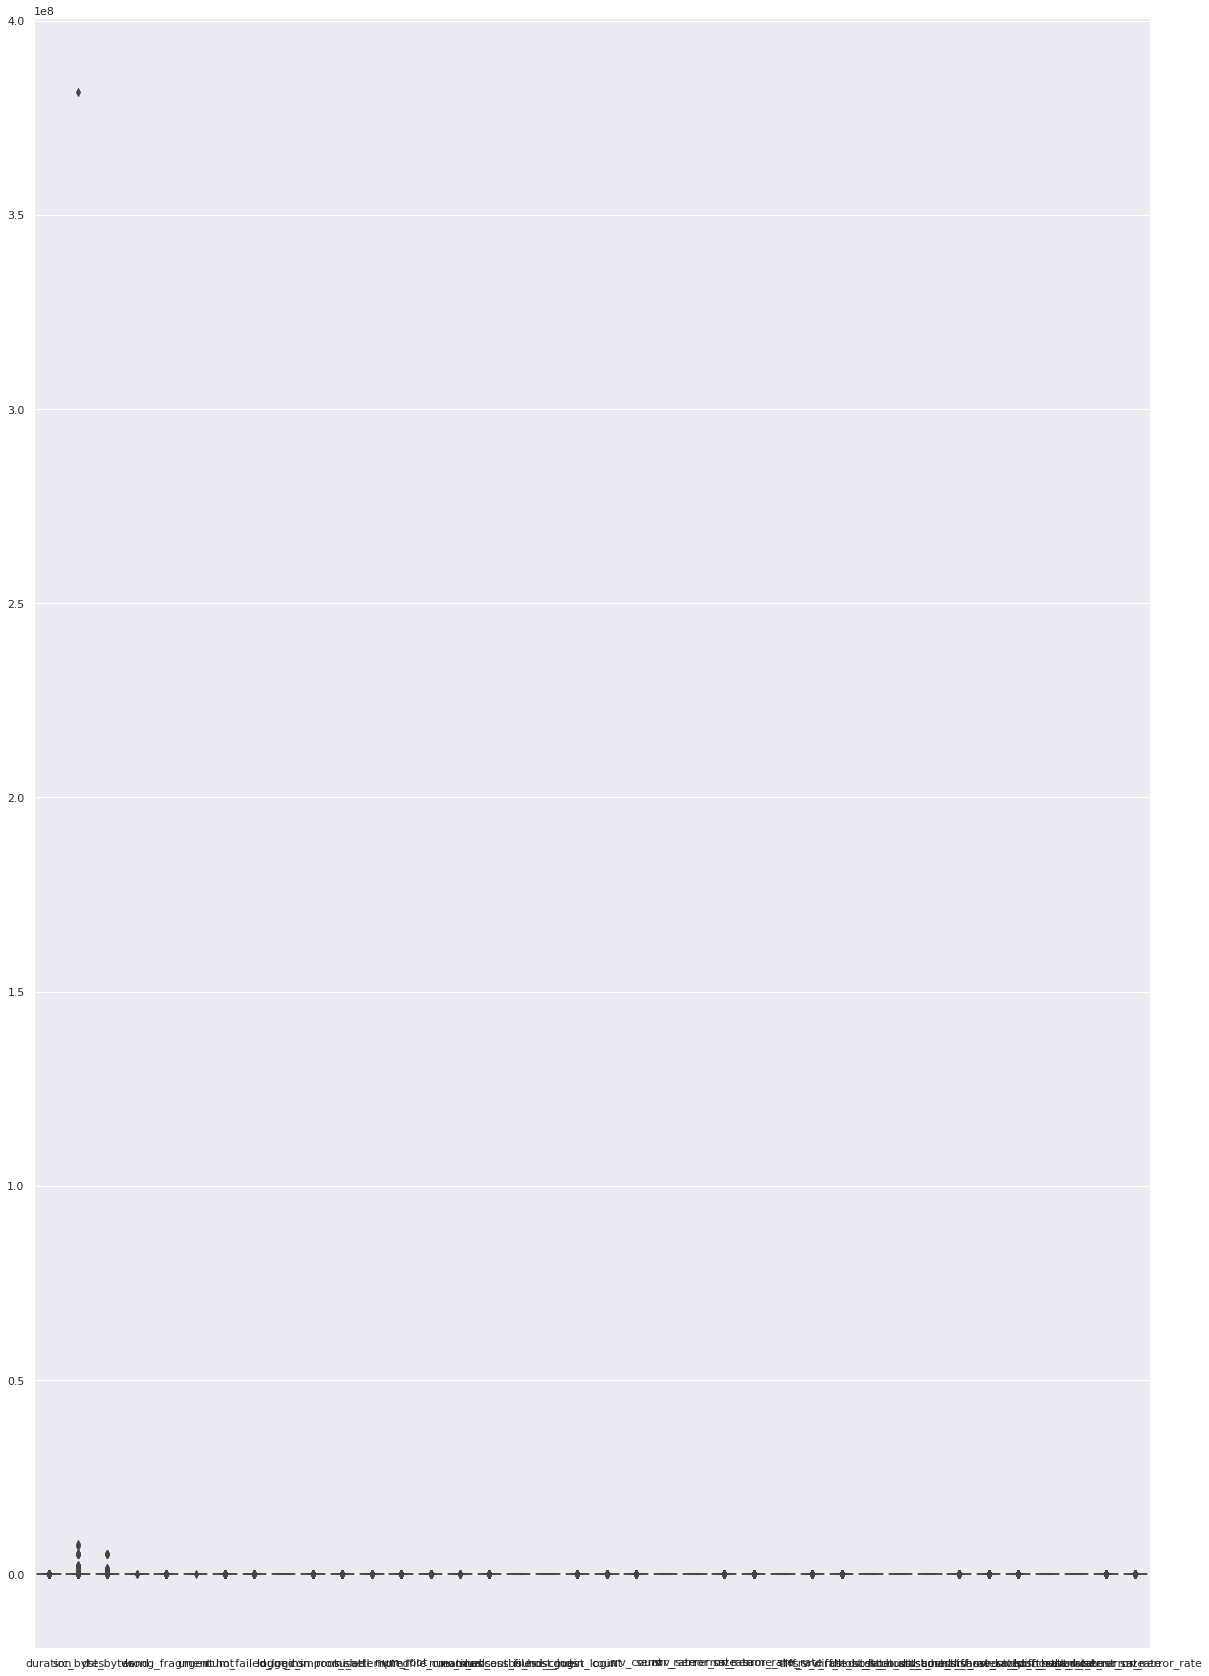

In [ ]:
#check outlayers again+infinit
plt.subplots(figsize=(20, 30))

sns.boxplot(data= df)
#def outlier_capping(x):
 #   x = x.clip(upper=x.quantile(0.99))
 #   x = x.clip(lower=x.quantile(0.01))
  #  return x

#train_num=train_num.apply(outlier_capping)

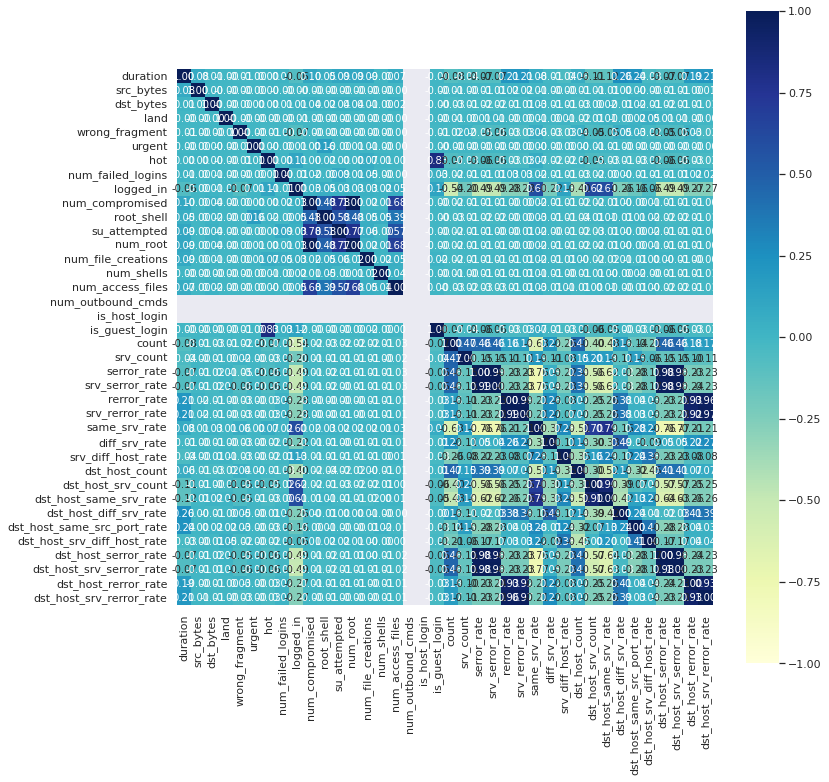

In [ ]:
### 5 What is the correlation between the features?
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmax = 1, vmin = -1, cmap = 'YlGnBu', cbar=True, annot=True, square=True, fmt='.2f', annot_kws = {'size': 10});


##############################################################################################################################

# **Part 3: Machine Learning Model**

In [17]:
protocol_dummies = pd.get_dummies(df['protocol_type'])#df=pd.get_dummies(df)


In [18]:
df = pd.concat([df, protocol_dummies], axis=1)

In [19]:
service_dummies = pd.get_dummies(df['service'], prefix='service_')

In [20]:
df = pd.concat([df, service_dummies], axis=1)

In [21]:
flag_dummies = pd.get_dummies(df['flag'], prefix='flag__')

In [22]:
df = pd.concat([df, flag_dummies], axis=1)

In [23]:
df.drop('protocol_type', inplace=True, axis=1)

In [24]:
df.drop('flag', inplace=True, axis=1)

In [25]:
df.drop('service', inplace=True, axis=1)

In [26]:
df["attack"] = df["attack"].astype(object).astype(int)

In [27]:
df.head(1)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,icmp,...,service__netstat,service__nnsp,service__nntp,service__ntp_u,service__other,service__pm_dump,service__pop_2,service__pop_3,service__printer,service__private,service__red_i,service__remote_job,service__rje,service__shell,service__smtp,service__sql_net,service__ssh,service__sunrpc,service__supdup,service__systat,service__telnet,service__tim_i,service__time,service__urh_i,service__urp_i,service__uucp,service__uucp_path,service__vmnet,service__whois,flag___OTH,flag___REJ,flag___RSTO,flag___RSTOS0,flag___RSTR,flag___S0,flag___S1,flag___S2,flag___S3,flag___SF,flag___SH
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.attack

0        1
1        1
2        0
3        1
4        1
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: attack, Length: 25192, dtype: int64

###  Define input and output columns

In [28]:
X=df.drop(["attack"], axis=1)
y = df['attack']
#x -> independent columns   #y -> target column 


In [29]:
X.shape

(25192, 118)

In [30]:
y.shape

(25192,)

###  Split dataset into train and test datasets

In [31]:
 X_Train, X_test, y_Train, y_test = train_test_split(X, y, test_size=.3, random_state=10) 

In [32]:
 X_Train, X_val, y_Train, y_val = train_test_split(X, y, test_size=.3, random_state=10) 

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
SC=StandardScaler()

In [35]:
x_train_s = SC.fit_transform(X_Train)
x_train_s

array([[-0.11226224, -0.01065328, -0.03506977, ..., -0.02609534,
         0.82311082, -0.03915969],
       [-0.11226224, -0.01073975, -0.03677146, ..., -0.02609534,
         0.82311082, -0.03915969],
       [-0.11226224, -0.01074253, -0.03832665, ..., -0.02609534,
        -1.21490324, -0.03915969],
       ...,
       [-0.11226224, -0.01065537, -0.03352585, ..., -0.02609534,
         0.82311082, -0.03915969],
       [-0.11226224, -0.01074253, -0.03832665, ..., -0.02609534,
        -1.21490324, -0.03915969],
       [-0.11226224, -0.01064009, -0.00456325, ..., -0.02609534,
         0.82311082, -0.03915969]])

In [36]:
A_val_s = SC.fit_transform(X_val)
A_val_s

array([[-0.11679676, -0.05709751, -0.04159588, ..., -0.01992707,
        -1.20017758, -0.04605924],
       [-0.11679676, -0.02948151, -0.04159588, ..., -0.01992707,
         0.83321003, -0.04605924],
       [-0.11641165, -0.03890012, -0.03747447, ..., -0.01992707,
         0.83321003, -0.04605924],
       ...,
       [-0.11679676, -0.05709751, -0.04159588, ..., -0.01992707,
        -1.20017758, -0.04605924],
       [-0.11679676, -0.05709751, -0.04159588, ..., -0.01992707,
        -1.20017758, -0.04605924],
       [-0.11641165, -0.04168988, -0.03791244, ..., -0.01992707,
         0.83321003, -0.04605924]])

In [37]:
A_test_s = SC.fit_transform(X_test)
A_test_s 

array([[-0.11679676, -0.05709751, -0.04159588, ..., -0.01992707,
        -1.20017758, -0.04605924],
       [-0.11679676, -0.02948151, -0.04159588, ..., -0.01992707,
         0.83321003, -0.04605924],
       [-0.11641165, -0.03890012, -0.03747447, ..., -0.01992707,
         0.83321003, -0.04605924],
       ...,
       [-0.11679676, -0.05709751, -0.04159588, ..., -0.01992707,
        -1.20017758, -0.04605924],
       [-0.11679676, -0.05709751, -0.04159588, ..., -0.01992707,
        -1.20017758, -0.04605924],
       [-0.11641165, -0.04168988, -0.03791244, ..., -0.01992707,
         0.83321003, -0.04605924]])

# 3.1 Build Classification Models


## 1) K- nearest Neighbor Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
kn_range=list(range(1,31))
print(kn_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [40]:
param_grid=dict(n_neighbors=kn_range)
print(param_grid)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [41]:
k_neigh = KNeighborsClassifier()
grid = GridSearchCV(k_neigh, param_grid, cv=5, scoring='recall')
grid.fit(X_Train, y_Train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='recall')

In [42]:
grid.best_params_

{'n_neighbors': 1}

In [43]:
k_nn = KNeighborsClassifier() #grid serch result
k_nn.fit(X_Train, y_Train)
y_predv=k_nn.predict(X_val)
y_pred=k_nn.predict(X_test)

In [ ]:
#y_pred=k_neigh.predict(X_test)
#y_pred

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9847843344800211

In [45]:
df.attack.value_counts()

1    13449
0    11743
Name: attack, dtype: int64

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3561
           1       0.99      0.98      0.99      3997

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558



## **3.1.1 : LogisticRegression**

1) LogisticRegression

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [48]:
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
model_lr = GridSearchCV(grid_values, param_grid=grid_values)

In [49]:
param_grid=dict(param_grid=grid_values)
print(param_grid)

{'param_grid': {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}}


In [50]:
modalLogisr=LogisticRegression()
Logistic = GridSearchCV(modalLogisr, grid_values, cv=5, scoring='precision')
Logistic.fit(X_Train,y_Train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='precision')

In [51]:
Logistic.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [52]:
modalLogisr=LogisticRegression( C=0.01, penalty='l2', solver='liblinear')
modalLogisr.fit(X_Train,y_Train)
val_predict=modalLogisr.predict(X_val)
test_predict =modalLogisr.predict(X_test)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      3561
           1       0.87      0.94      0.90      3997

    accuracy                           0.89      7558
   macro avg       0.90      0.89      0.89      7558
weighted avg       0.90      0.89      0.89      7558



In [54]:
#fit the model with data

accuracy_score(y_test, test_predict)

0.8929611008203229

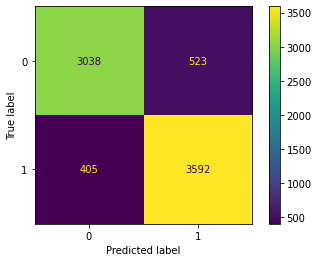

In [55]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Logistic,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=["0", "1"])

# XGboost

In [56]:
X1 = df.drop('attack', axis=1).copy()
X1.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,icmp,tcp,...,service__netstat,service__nnsp,service__nntp,service__ntp_u,service__other,service__pm_dump,service__pop_2,service__pop_3,service__printer,service__private,service__red_i,service__remote_job,service__rje,service__shell,service__smtp,service__sql_net,service__ssh,service__sunrpc,service__supdup,service__systat,service__telnet,service__tim_i,service__time,service__urh_i,service__urp_i,service__uucp,service__uucp_path,service__vmnet,service__whois,flag___OTH,flag___REJ,flag___RSTO,flag___RSTOS0,flag___RSTR,flag___S0,flag___S1,flag___S2,flag___S3,flag___SF,flag___SH
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y1 =df['attack'].copy()

In [ ]:
X1.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
y1.unique()

array([1, 0])

In [ ]:
sum(y1)/len(y1)

0.5338599555414417

In [ ]:
sum(y_Train)/len(y_Train)

0.5360099807190655

In [ ]:
sum(y_test)/len(y_test)

0.5288436094204816

In [57]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic')
clf_xgb.fit(X_Train,
            y_Train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.980579
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.980282
[2]	validation_0-aucpr:0.980432
[3]	validation_0-aucpr:0.980461
[4]	validation_0-aucpr:0.981668
[5]	validation_0-aucpr:0.981714
[6]	validation_0-aucpr:0.983199
[7]	validation_0-aucpr:0.983209
[8]	validation_0-aucpr:0.983303
[9]	validation_0-aucpr:0.983297
[10]	validation_0-aucpr:0.998057
[11]	validation_0-aucpr:0.99809
[12]	validation_0-aucpr:0.998189
[13]	validation_0-aucpr:0.998299
[14]	validation_0-aucpr:0.998433
[15]	validation_0-aucpr:0.998606
[16]	validation_0-aucpr:0.998684
[17]	validation_0-aucpr:0.998774
[18]	validation_0-aucpr:0.998876
[19]	validation_0-aucpr:0.999024
[20]	validation_0-aucpr:0.999091
[21]	validation_0-aucpr:0.999133
[22]	validation_0-aucpr:0.999176
[23]	validation_0-aucpr:0.999179
[24]	validation_0-aucpr:0.999247
[25]	validation_0-aucpr:0.99923
[26]	validation_0-aucpr:0.999237
[27]	validation_0-aucpr:0.999482
[28]	validation_0-aucp

XGBClassifier()

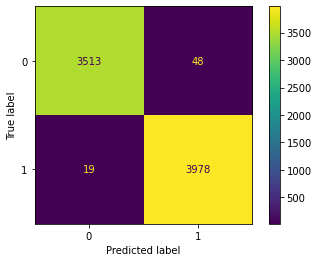

In [58]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=["0", "1"])

In [59]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5]
}
param_grid

{'gamma': [0, 0.25, 1.0],
 'learning_rate': [0.1, 0.01, 0.05],
 'max_depth': [3, 4, 5],
 'reg_lambda': [0, 1.0, 10.0],
 'scale_pos_weight': [1, 3, 5]}

In [60]:
optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=1.0),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=2,
    n_jobs=10,
    cv=3                        
)
optimal_params.fit(x_train_s, y_Train)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=1.0, seed=42,
                                     subsample=0.9),
             n_jobs=10,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc', verbose=2)

In [61]:
optimal_params.best_params_

{'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 5,
 'reg_lambda': 0,
 'scale_pos_weight': 5}

In [62]:
clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma= 0.25,
                            learning_rate=0.1,
                            max_depth=5,
                            reg_lambda=0,
                            scale_pos_weight=5,
                            subsample=0.9,
                            colsample_bytree=0.5)

clf_xgb.fit(x_train_s,
            y_Train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(A_test_s, y_test)])

[0]	validation_0-aucpr:0.845056
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.968463
[2]	validation_0-aucpr:0.969526
[3]	validation_0-aucpr:0.985184
[4]	validation_0-aucpr:0.98913
[5]	validation_0-aucpr:0.989328
[6]	validation_0-aucpr:0.989001
[7]	validation_0-aucpr:0.988403
[8]	validation_0-aucpr:0.991156
[9]	validation_0-aucpr:0.994008
[10]	validation_0-aucpr:0.995083
[11]	validation_0-aucpr:0.9961
[12]	validation_0-aucpr:0.996842
[13]	validation_0-aucpr:0.99654
[14]	validation_0-aucpr:0.996182
[15]	validation_0-aucpr:0.996193
[16]	validation_0-aucpr:0.996785
[17]	validation_0-aucpr:0.997284
[18]	validation_0-aucpr:0.997279
[19]	validation_0-aucpr:0.997277
[20]	validation_0-aucpr:0.997058
[21]	validation_0-aucpr:0.996955
[22]	validation_0-aucpr:0.99698
[23]	validation_0-aucpr:0.996995
[24]	validation_0-aucpr:0.996875
[25]	validation_0-aucpr:0.996909
[26]	validation_0-aucpr:0.996661
[27]	validation_0-aucpr:0.997001
Stopping. Best iteration:

XGBClassifier(colsample_bytree=0.5, gamma=0.25, max_depth=5, reg_lambda=0,
              scale_pos_weight=5, seed=42, subsample=0.9)

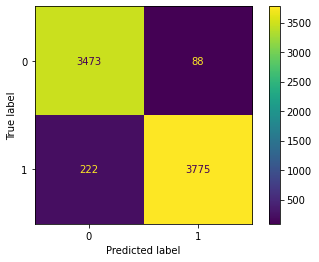

In [63]:
plot_confusion_matrix(clf_xgb,
                      A_test_s,
                      y_test,
                      values_format='d',
                      display_labels=["0", "1"])

In [64]:
clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma= 0.25,
                            learning_rate=0.1,
                            max_depth=5,
                            reg_lambda=0,
                            scale_pos_weight=5,
                            subsample=0.9,
                            colsample_bytree=0.5,
                            n_estimators=1)

clf_xgb.fit(x_train_s,y_Train)

XGBClassifier(colsample_bytree=0.5, gamma=0.25, max_depth=5, n_estimators=1,
              reg_lambda=0, scale_pos_weight=5, seed=42, subsample=0.9)

In [65]:
y_pred2= clf_xgb.predict(A_test_s) #x_test_s

In [66]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81      3561
           1       1.00      0.59      0.74      3997

    accuracy                           0.78      7558
   macro avg       0.84      0.80      0.78      7558
weighted avg       0.85      0.78      0.78      7558



## BAGGED DECISION TREE

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [68]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=None)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model.fit(X_Train, y_Train)
results = model_selection.cross_val_score(model, X_Train, y_Train, cv=kfold)
print(results.mean())

0.9965408889969296


In [69]:
model.fit(X_Train, y_Train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=7)

In [70]:
y_pred3=model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [71]:
accuracy_score( y_test, y_pred3 )

0.997618417570786

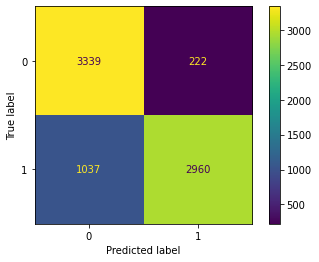

In [72]:
plot_confusion_matrix(model,
                      A_test_s,
                      y_test,
                      values_format='d',
                      display_labels=["0", "1"])

## RANDOM FOREST

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
# Grid search
param_grid_f = { 
    'n_estimators': [10,20, 30,40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [75]:
rfc=RandomForestClassifier()
CV_rfc = GridSearchCV(rfc, param_grid=param_grid_f, cv= 5)
CV_rfc.fit(X_Train, y_Train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40]})

In [76]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 40}

In [78]:
random_forest = RandomForestClassifier(criterion ='entropy',
 max_depth = 8,
 max_features= 'sqrt',
 n_estimators = 40 )
random_forest.fit(X_Train, y_Train)
random_pred = random_forest.predict(X_test)

In [79]:
print(classification_report(y_test,random_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3561
           1       0.99      1.00      0.99      3997

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



In [80]:
accuracy_score( y_test, y_pred )

0.9847843344800211

# Stacking

In [82]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [83]:
lr = LogisticRegression()
KNN_model= KNeighborsClassifier(n_neighbors = 1) 
LOR_model = LogisticRegression(C =  0.001, penalty='l1')#grid search result
RNDOM_model = RandomForestClassifier(criterion ='gini',
 max_depth = 8,
 max_features= 'auto',
 n_estimators = 30)#grid search result
xgboost_model = xgb.XGBClassifier(gamma= 0.25,
                                      learning_rate= 0.1,
                                      max_depth= 5,
                                      reg_lambda= 0,
                                      scale_pos_weight= 5)
# Get these models in a list
estimators = {('KNe',k_neigh),
              ('LogisticRegression',modalLogisr),
              ('RandomForestClassifier',random_forest),
              ('xgboost',clf_xgb)}

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3561
           1       1.00      1.00      1.00      3997

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



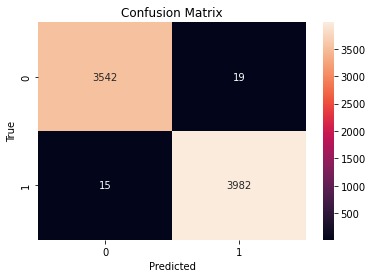

In [84]:
#Stack these models with StackingRegressor
stacking_clf = StackingClassifier(estimators=estimators,
                                       final_estimator=lr)
stacking_clf.fit(X_Train,y_Train)
pred = stacking_clf.predict(X_test)
matrix = confusion_matrix(y_test, pred)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('True');
print(classification_report(y_test, pred))

 lgbmboost model

In [85]:
import lightgbm as lgb

In [86]:
from sklearn.model_selection import RandomizedSearchCV
gb_2=lgb.LGBMClassifier()
parameters_2 = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}

In [87]:
lgmb_22 = GridSearchCV(gb_2, parameters_2, n_jobs=-1, scoring='precision',cv=5)
lgmb_22.fit(X_Train,y_Train)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [5, 10, 20],
                         'min_child_samples': [5, 10, 15],
                         'num_leaves': [20, 40, 60, 80, 100],
                         'reg_alpha': [0, 0.01, 0.03]},
             scoring='precision')

In [88]:
print(lgmb_22.best_params_)

{'learning_rate': 0.2, 'max_depth': 5, 'min_child_samples': 10, 'num_leaves': 40, 'reg_alpha': 0.03}


In [89]:
modelgbm_2 = lgb.LGBMClassifier(learning_rate=0.2, max_depth= 5, min_child_samples= 10, num_leaves= 40, reg_alpha= 0.03)
modelgbm_2.fit(X_Train,y_Train)

LGBMClassifier(learning_rate=0.2, max_depth=5, min_child_samples=10,
               num_leaves=40, reg_alpha=0.03)

In [90]:
y_lightgbm_pred_2 = modelgbm_2.predict(X_Train)

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3561
           1       0.99      0.98      0.99      3997

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558



# LinearSVC

In [93]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [94]:
thismodel =LinearSVC(random_state=0, tol=1e-5)

In [95]:
FeatureSelection = SelectFromModel(estimator = thismodel, max_features = None) # make sure that thismodel is well-defined
X = FeatureSelection.fit_transform(X_Train, y_Train) 

In [96]:
Xcc = df.drop('attack', axis=1)
ycc = df['attack']

In [97]:
sel = SelectFromModel(LinearSVC()) 
sel.fit(X_Train, y_Train) 

selected_features = sel.transform(X_Train)
sel.get_support()


array([False, False, False,  True,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False,  True,  True, False, False, False,  True, False,
        True,  True, False, False,  True,  True,  True, False,  True,
       False])

In [100]:
thismodel.fit(X_Train, y_Train) 

LinearSVC(random_state=0, tol=1e-05)

In [103]:
y_pred_sel = thismodel.predict(A_test_s)

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_sel)

0.9330510717120931

In [105]:
print(classification_report(y_test, y_pred_sel))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3561
           1       0.94      0.93      0.94      3997

    accuracy                           0.93      7558
   macro avg       0.93      0.93      0.93      7558
weighted avg       0.93      0.93      0.93      7558



Text(0.5, 15.0, 'Predicted label')

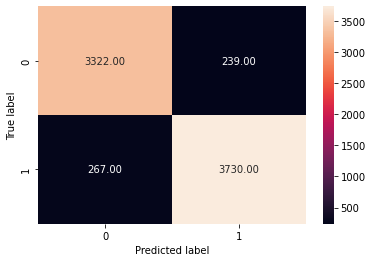

In [106]:
import sklearn.metrics as metrics

nb_cm = metrics.confusion_matrix( y_test, y_pred_sel )
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')